# Trouver sa position en connaissant la position des balises

In [1]:
import numpy as np
import matplotlib.pyplot as pl
# from matplotlib.pyplot import rcParams
# rcParams['figure.figsize'] = 20, 20
pl.figure(figsize=(15,13))

# %matplotlib inline
%matplotlib notebook

In [2]:
import os
os.chdir("..")

In [3]:
from src.main.constants import *
import src.main.main_script as mm
import src.main.clustering as clus
import src.main.data_cleansing as dacl
import src.main.output_rendering as outr
from src.retrieve_realistic_measures import get_table_measures
import src.check_hough as chh
import src.check_clustering as chc
from src.main.geometry import Point, Vector
from src.main.table import Square, Table

In [4]:
os.getcwd()
os.chdir("src")

## La position des balises est parfaitement connue

Le robot a pour état (1000, 560, np.pi/3) dans le référentiel de la table.

In [5]:
unknown_robot_state = (1000, 500, np.pi/3)

In [6]:
import src.main.clustering as clus

In [7]:
beacon_1 = clus.Beacon()
beacon_1.set_by_upper_left_and_lower_right(beacons_purple[0][0], beacons_purple[0][1])
beacon_1.set_radius(FIX_BEACON_RADIUS)
beacon_2 = clus.Beacon()
beacon_2.set_by_upper_left_and_lower_right(beacons_purple[1][0], beacons_purple[1][1])
beacon_2.set_index(1)
beacon_2.set_radius(FIX_BEACON_RADIUS)
beacon_3 = clus.Beacon()
beacon_3.set_by_upper_left_and_lower_right(beacons_purple[2][0], beacons_purple[2][1])
beacon_3.set_index(2)
beacon_3.set_radius(FIX_BEACON_RADIUS)
beacons = [beacon_1, beacon_2, beacon_3]

In [8]:
print(str(beacon_1)+"\n"+str(beacon_2)+"\n"+str(beacon_3))

(1550.0,1950.0) , 100 n°0
(-1550.0,1000.0) , 100 n°1
(1550.0,50.0) , 100 n°2


In [9]:
def beacon_seen_from(robot_state, beacon):
    p1 = Point(robot_state[0], robot_state[1])
    print("p1 "+str(p1))
    p2 = beacon.center
    print("p2 "+str(p2))
    v = Vector()
    v.set_by_points(p1, p2)
    print("v "+str(v))
    angle = v.compute_angle()
    rho = v.compute_distance()
    return rho, -robot_state[2] + angle

In [10]:
simulated_polar_beacon_position = beacon_seen_from(unknown_robot_state, beacon_1)
simulated_polar_beacon_position

p1 (1000,500)
p2 (1550.0,1950.0)
v 550.0 - 1450.0


(1550.8062419270823, 0.16105453833379135)

In [11]:
np.rad2deg(2.2554496407269866)

129.22774531795417

In [12]:
robot_point = Point(unknown_robot_state[0], unknown_robot_state[1])

In [13]:
v = Vector()
v.set_by_points(robot_point, beacon_1.center)
print(beacon_1.center)
str(v.apply_to_point(robot_point))

(1550.0,1950.0)


'(1550.0,1950.0)'

In [14]:
coordinates_from_robot = Point(np.cos(simulated_polar_beacon_position[1])*simulated_polar_beacon_position[0],
          np.sin(simulated_polar_beacon_position[1])*simulated_polar_beacon_position[0])
estimated_beacon_position = robot_point + coordinates_from_robot
str(estimated_beacon_position)

'(2530.736835487436,748.6860279185589)'

In [15]:
v_balise = Vector()
v_balise.set_by_points(Point(0, 0), beacon_1.center)

In [16]:
v_robot = Vector()
v_robot.set_by_points(Point(0, 0), robot_point)

In [17]:
v_robot_orientation = Vector()
v_robot_orientation.create_unitary(unknown_robot_state[2])

In [18]:
v_mesure_balise_1_from_robot = Vector()
v_mesure_balise_1_from_robot.set_coordinates(coordinates_from_robot.x, coordinates_from_robot.y)
str(v_mesure_balise_1_from_robot)

'1530.736835487436 - 248.68602791855886'

<IPython.core.display.Javascript object>


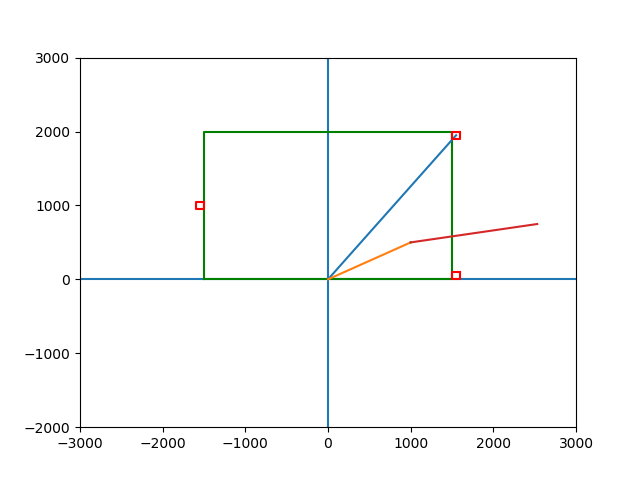

In [19]:
%matplotlib notebook
# table instantiation
table = Table()

table_beacon_1 = Square([Point(-1500 - 100, 2000), Point(-1500, 2000), Point(-1500, 2000 - 100),
                   Point(-1500 - 100, 2000 - 100)])
table_beacon_2 = Square([Point(1500, 1000 + 50), Point(1500 + 100, 1000 + 50), Point(1500 + 100, 1000 - 50),
                   Point(1500, 1000 - 50)])
table_beacon_3 = Square([Point(-1500 - 100, 0 + 100), Point(-1500, 0 + 100), Point(-1500, 0), Point(-1500 - 100, 0)])

table_beacon_1.take_symmetric()
table_beacon_2.take_symmetric()
table_beacon_3.take_symmetric()

table.add_square_obstacle(table_beacon_1)
table.add_square_obstacle(table_beacon_2)
table.add_square_obstacle(table_beacon_3)

table.add_edge_point(Point(-1500, 0))
table.add_edge_point(Point(1500, 0))
table.add_edge_point(Point(1500, 2000))
table.add_edge_point(Point(-1500, 2000))




# table.translate(translation_vectors[identifier])

# rotation_angle = 0.5
# rotation_angle = np.pi/2
# table.rotate(rotation_angle)

# measure = Point(0, 1800)
# measure = translation_vector.apply_to_point(measure)
# measure.rotate(rotation_angle)

table.init_plot()
table.plot_edges()

table.plot_vector(v_balise)
table.plot_vector(v_robot)
table.plot_vector_from_point(v_robot, v_robot_orientation)

table.plot_vector_from_point(v_robot, v_mesure_balise_1_from_robot)




table.plot_obstacles()
# table.plot_measures(measure, vectors, robot_vector)
table.plot()

In [20]:
str(robot_point)

'(1000,500)'

In [21]:
str(coordinates_from_robot)

'(1530.736835487436,248.68602791855886)'

In [22]:
str(estimated_beacon_position)

'(2530.736835487436,748.6860279185589)'

In [23]:
estimated_beacon_position.y

748.6860279185589

In [24]:
str(v.apply_to_point(robot_point))

'(1550.0,1950.0)'

## On ne connaît la position que d'une balise